In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf


mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False


In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)

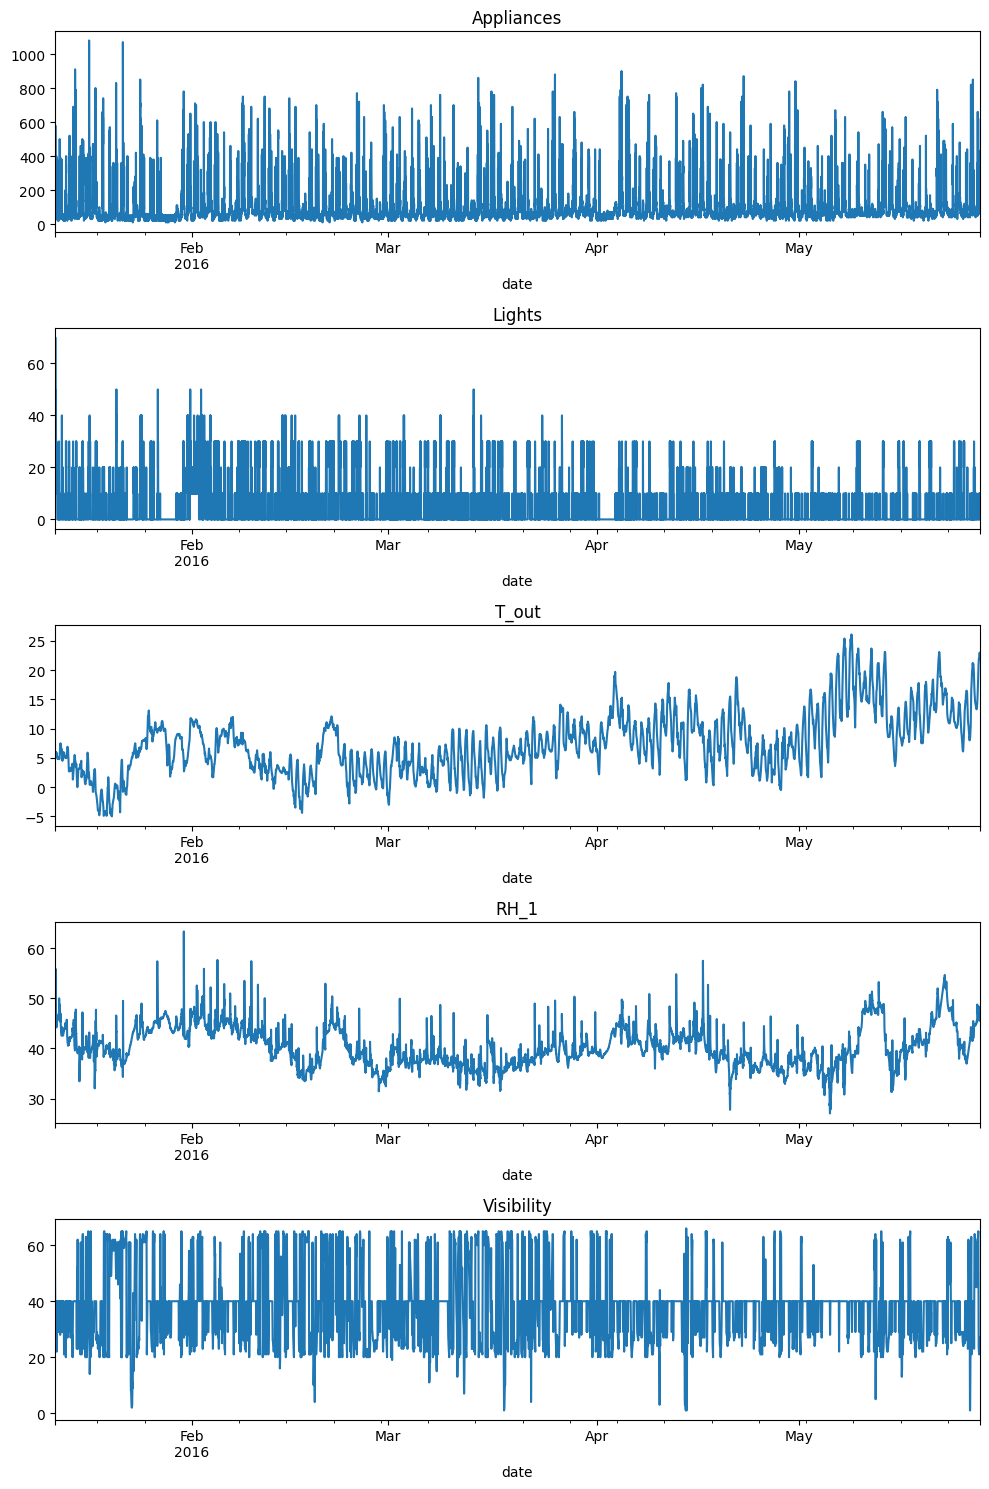

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

df.set_index('date')['Appliances'].plot(ax=axs[0], title='Appliances')
df.set_index('date')['lights'].plot(ax=axs[1], title='Lights')
df.set_index('date')['T_out'].plot(ax=axs[2], title='T_out')
df.set_index('date')['RH_1'].plot(ax=axs[3], title='RH_1')
df.set_index('date')['Visibility'].plot(ax=axs[4], title='Visibility')

plt.tight_layout()
plt.show()

In [7]:
df_input=df[['Appliances','T_out','RH_1','Visibility']]

In [8]:
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [9]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [10]:
df_input.query("Appliances > 500")
df_input['Appliances'].max()

1080

In [11]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [12]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [13]:
features=data_scaled
target=data_scaled[:,0]

In [14]:
TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=123,shuffle=False)

In [16]:
x_train.shape

(15788, 4)

In [17]:
x_test.shape

(3947, 4)

In [18]:
win_length=720
batch_size=32
num_features=4
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [19]:
print(train_generator[0])

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
        [0.04672897, 0.36923901, 0.54132648, 0.89487179],
        [0.03738318, 0.36548767, 0.53050179, 0.83589744],
        ...,
        [0.06542056, 0.25241158, 0.31584258, 0.79230769],
        [0.05607477, 0.23901393, 0.31309054, 0.72820513],
        [0.06542056, 0.22561629, 0.31107238, 0.66410256]],

       [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
        [0.03738318, 0.36548767, 0.53050179, 0.83589744],
        [0.03738318, 0.36173633, 0.52408036, 0.77692308],
        ...,
        [0.05607477, 0.23901393, 0.31309054, 0.72820513],
        [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        [0.06542056, 0.21221865, 0.30923768, 0.6       ]],

       [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
        [0.03738318, 0.36173633, 0.52408036, 0.77692308],
        [0.04672897, 0.35798499, 0.53141914, 0.71794872],
        ...,
        [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        [0.06542056, 0.21221

In [20]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(128,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [22]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=2,
                                                mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator,epochs=50,
                            validation_data=test_generator,
                            shuffle=False,
                            callbacks=[early_stopping])

Epoch 1/50


<ipython-input-22-b4ecc56c6ada>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=50,


471/471 [==============================] - 47s 72ms/step - loss: 0.0086 - mean_absolute_error: 0.0519 - val_loss: 0.0057 - val_mean_absolute_error: 0.0499
Epoch 2/50
471/471 [==============================] - 33s 69ms/step - loss: 0.0065 - mean_absolute_error: 0.0418 - val_loss: 0.0041 - val_mean_absolute_error: 0.0348
Epoch 3/50
471/471 [==============================] - 34s 72ms/step - loss: 0.0046 - mean_absolute_error: 0.0341 - val_loss: 0.0033 - val_mean_absolute_error: 0.0288
Epoch 4/50
471/471 [==============================] - 33s 71ms/step - loss: 0.0042 - mean_absolute_error: 0.0320 - val_loss: 0.0033 - val_mean_absolute_error: 0.0295
Epoch 5/50
471/471 [==============================] - 34s 72ms/step - loss: 0.0041 - mean_absolute_error: 0.0314 - val_loss: 0.0032 - val_mean_absolute_error: 0.0290
Epoch 6/50
471/471 [==============================] - 33s 71ms/step - loss: 0.0041 - mean_absolute_error: 0.0314 - val_loss: 0.0032 - val_mean_absolute_error: 0.0298
Epoch 7/50
471/

In [24]:
model.evaluate(test_generator,verbose=0)

[0.003200642531737685, 0.02779513970017433]

In [25]:
predictions=model.predict(test_generator)

101/101 [==============================] - 4s 28ms/step


In [26]:
predictions.shape[0]

3227

In [27]:
predictions

array([[0.06407301],
       [0.09248383],
       [0.115978  ],
       ...,
       [0.08629926],
       [0.25489587],
       [0.2639106 ]], dtype=float32)

In [28]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [31]:
x_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [30]:
 x_test[:,1:][win_length:]

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [34]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [37]:
df_pred

,0,0,1,2
0,0.064073,0.453376,0.208513,0.600000
1,0.092484,0.471061,0.182827,0.600000
2,0.115978,0.488746,0.184662,0.600000
3,0.340253,0.506431,0.193996,0.600000
4,0.137878,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.085351,0.891747,0.537657,0.348718
3223,0.099606,0.887460,0.536006,0.361538
3224,0.086299,0.883173,0.538666,0.374359
3225,0.254896,0.878885,0.549491,0.387179


In [35]:
rev_trans=scaler.inverse_transform(df_pred)

In [36]:
rev_trans

array([[ 78.55812207,   9.1       ,  34.6       ,  40.        ],
       [108.95770177,   9.65      ,  33.66666667,  40.        ],
       [134.09646273,  10.2       ,  33.73333333,  40.        ],
       ...,
       [102.34021135,  22.46666667,  46.59666667,  25.33333333],
       [282.73857653,  22.33333333,  46.99      ,  26.16666667],
       [292.38433301,  22.2       ,  46.6       ,  27.        ]])

In [38]:
df_final=df_input[predictions.shape[0]*-1:]

In [39]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [40]:
df_final['App_pred']=rev_trans[:,0]

<ipython-input-40-097fd4411573>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_pred']=rev_trans[:,0]


In [41]:
df_final

,Appliances,T_out,RH_1,Visibility,App_pred
16508,90,9.100000,34.600000,40.000000,78.558122
16509,120,9.650000,33.666667,40.000000,108.957702
16510,390,10.200000,33.733333,40.000000,134.096463
16511,240,10.750000,34.072500,40.000000,374.070450
16512,120,11.300000,33.630000,40.000000,157.529652
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,101.326022
19731,90,22.600000,46.500000,24.500000,116.578125
19732,270,22.466667,46.596667,25.333333,102.340211
19733,420,22.333333,46.990000,26.166667,282.738577


<Axes: >

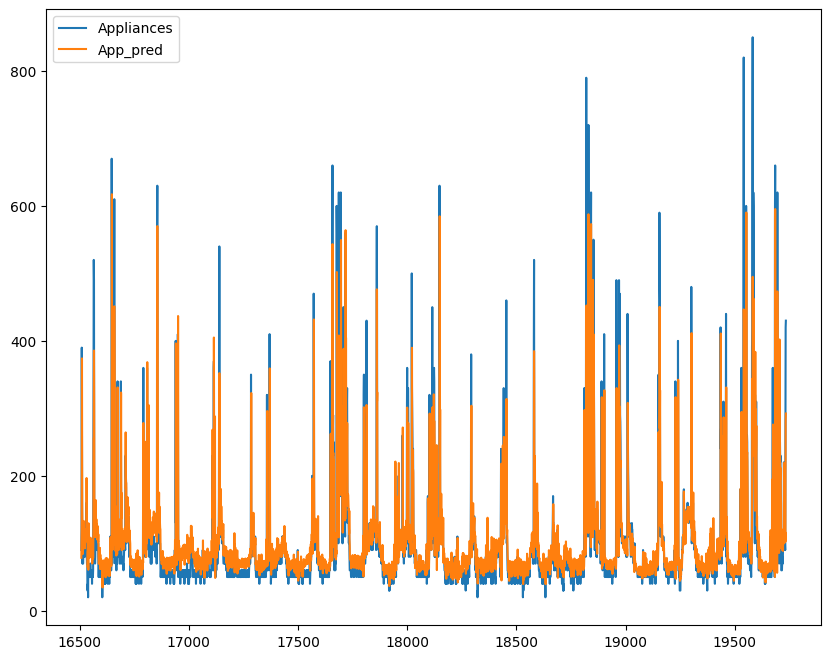

In [42]:
df_final[['Appliances','App_pred']].plot()